# Discussion 3: String, Group, Joining Operations in Pandas

We will continue discussion of [Pandas](https://pandas.pydata.org/). In this discussion, you will learn about:

* String operations
* Groupby 
* Joining DataFrames

You will not have enough time to do all of these problems in discussion and your TA will select a subset of the problems to complete. The rest are provided for your practice.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import zipfile
from pathlib import Path
%matplotlib inline

import urllib.request
import os.path
import zipfile

#Download and unzip data for babynames
data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

#create dataframe of babynames
ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

elections = pd.read_csv("elections.csv")
display(elections.head(5))
display(babynames.head(5))

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


## Question 1a

We perform some basic EDA on this data, and we decide to visualize the popularity of the names Luke, Leia, and Han from Star Wars to see if there is a relationship with the release of the major films with the popularity of these names. 

Fill in the blanks to output a Series that contains the year as the index and the number of total Star Wars names as the value, so we can make the plot below!

*Hint:* `babynames['Name'].isin(['Helen', 'Jon'])` returns `[True, False, ...]`.


<Axes: title={'center': 'Star Wars Names'}, xlabel='Year', ylabel='Count'>

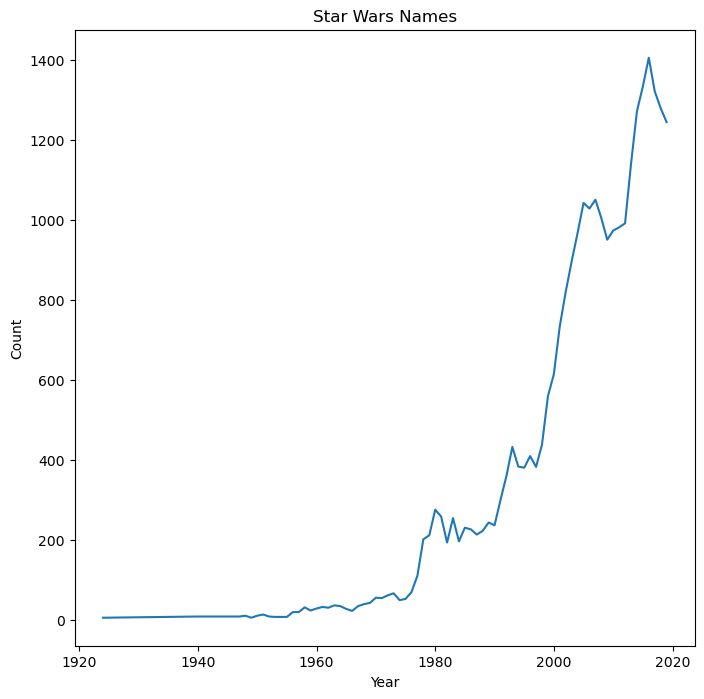

In [3]:
sw_names = ['Luke', 'Leia', 'Han']
babynames[babynames['Name'].isin(sw_names)] \
         .groupby('Year')['Count'].sum() \
         .plot(ylabel = 'Count', title = 'Star Wars Names', 
               figsize = (8, 8))

## Question 1b

Define the fluctuation of a baby name as the mathematical range of its count per year throughout its history (i.e. maximum count subtracted by minimum count). 

Write a line of Pandas code to determine per-state fluctuations for all baby names, sorted from greatest to least.

In [5]:
babynames.groupby(['State','Name'])['Count'].agg(lambda x:x.max()-x.min()).sort_values(ascending=False)

State  Name       
CA     Michael        8255
       David          8110
       John           7321
       Robert         7091
       Jessica        6946
                      ... 
       Randeep           0
       Hannahgrace       0
       Hannaley          0
       Hannibal          0
       Emilianna         0
Name: Count, Length: 19830, dtype: int64

## Question 1c

Define an upset as an election result for a party that is an outlier vote share attained in that party's history. Fill in the blanks below to find all the rows in `elections` corresponding to election upsets in American history per this definition.

*Hint:* the `quantile` function can return the quartiles of the data; for example, `elections['\%'].quantile(0.25)` returns the first quartile ($Q_1$). Recall that a point is an outlier if it is outside the interval $[Q_1 - 1.5 \text{IQR}, Q_3 + 1.5 \text{IQR}]$.

In [8]:
def outlier(subdf):
    q1, q3 = subdf['%'].quantile(0.25), subdf['%'].quantile(0.75)
    iqr = q3-q1
    return subdf[(subdf['%'] < q1-1.5*iqr) | (subdf['%'] > q3+1.5*iqr)]
elections.groupby("Party").apply(outlier)

,,Year,Candidate,Party,Popular vote,Result,%
Party,,,,,,,
Democratic,81,1924,John W. Davis,Democratic,8386242,loss,28.976291
Green,155,2000,Ralph Nader,Green,2882955,loss,2.741176
Independent,143,1992,Ross Perot,Independent,19743821,loss,18.956298
Libertarian,175,2016,Gary Johnson,Libertarian,4489235,loss,3.307714
Republican,69,1912,William Taft,Republican,3486242,loss,23.218466
Whig,7,1836,Hugh Lawson White,Whig,146109,loss,10.005985


## Question 1d

Write a line of code to output the following DataFrame showing the average winning and losing vote share for every party that has won an election. 

*Hint:* The arguments to `pivot_table` are `index`,  `columns`, `values`, and `aggfunc`.

In [13]:
elections.pivot_table(
    index='Party',
    columns='Result',
    values='%',
    aggfunc=np.mean,
).dropna(axis=0,subset='win')

Result,loss,win
Party,,
Democratic,43.697060,51.441864
Democratic-Republican,57.210122,42.789878
National Union,NaN,54.951512
Republican,42.047791,52.366967
Whig,35.258650,50.180255


## Question 1e

Fill in the blanks below to create a new column `Middle Name` containing every candidate's middle name (or middle initial). If a candidate has no middle name, that entry should be NaN. 

*Hint:* The default entry of any element in a DataFrame if unspecified is NaN!


In [16]:
mid = elections['Candidate'].str.split()
elections.loc[mid.str.len() == 3, 'Middle Name'] = mid.str[1]
elections

,Year,Candidate,Party,Popular vote,Result,%,Middle Name
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122,NaN
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878,Quincy
2,1828,Andrew Jackson,Democratic,642806,win,56.203927,NaN
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073,Quincy
4,1832,Andrew Jackson,Democratic,702735,win,54.574789,NaN
...,...,...,...,...,...,...,...
173,2016,Donald Trump,Republican,62984828,win,46.407862,NaN
174,2016,Evan McMullin,Independent,732273,loss,0.539546,NaN
175,2016,Gary Johnson,Libertarian,4489235,loss,3.307714,NaN
176,2016,Hillary Clinton,Democratic,65853514,loss,48.521539,NaN


## Question 1f

Define election twins as two candidates that share the same middle name (or middle initial). Fill in the code below to determine the number of election twins.

*Hint:* Try to use a merge, and recall that for merges with non-unique column names, Pandas will rename the non-unique column name with an `_x` suffix for the left table and `_y` suffix for the right table (i.e. for a column `col`, the resulting names would be `col_x` and `col_y`).

In [19]:
def election_twins(elections):
    elections = elections.dropna(axis=0)
    twins = pd.merge(left=elections,right=elections,on='Middle Name')
    # print(twins)
    twins = twins[twins['Candidate_x'] < twins['Candidate_y']] #delete the same name and repeat connection
    return len(twins)

election_twins(elections)

36